#  Detecting Credit Card Fraud with Decision Trees and SVM

In [277]:
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

In [278]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

In [378]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [280]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Dataset Analysis

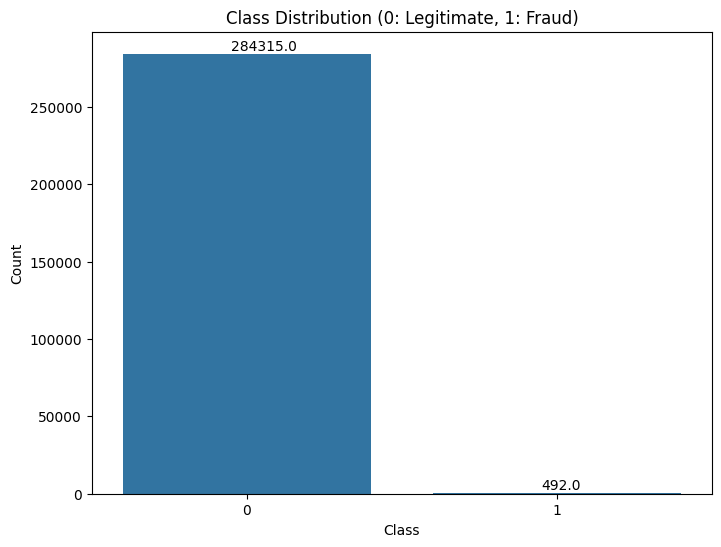

In [281]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=df)

# Add title and labels
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')

# Optional: Add the actual numbers on top of the bars for clarity
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.35, p.get_height() + 2000))
plt.show()

the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent), so we need to model a binary classification problem. Moreover, the dataset is highly unbalanced; the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.

<Axes: >

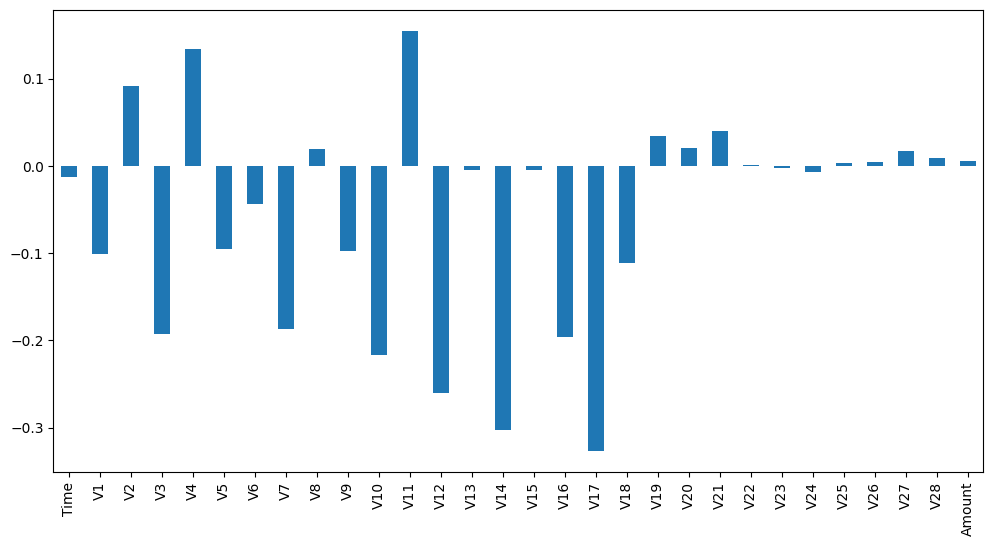

In [282]:
# undrstanding the correlation between the features with target variable
correlation = df.corr()['Class'].drop('Class')
correlation.plot(kind='bar', figsize=(12,6))

In [321]:
# finding the top 8 features that affect the target variable the most
Top8Features = abs(correlation).sort_values(ascending=False).head(6)
Top8Features

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
Name: Class, dtype: float64

In [322]:
Top8Features_names = correlation.abs().sort_values(ascending=False).head(6).index.tolist()
Top8Features_names

['V17', 'V14', 'V12', 'V10', 'V16', 'V3']

In [355]:
data_matrix = df.values
data_matrix

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
        -2.65608286e-02,  6.78800000e+01,  0.00000000e+00],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.04532821e-01,  1.00000000e+01,  0.00000000e+00],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         1.36489143e-02,  2.17000000e+02,  0.00000000e+00]],
      shape=(284807, 31))

## Data Preprocessing

In [393]:
# data standardization
cols = df.columns[1:30]
df[cols] = StandardScaler().fit_transform(df[cols])
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,0.0,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,1.0,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,1.0,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,2.0,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,0
284803,172787.0,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,0
284804,172788.0,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,0
284805,172788.0,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,0


In [394]:
X = df.iloc[:,1:30]
y = df.iloc[:,30]

In [395]:
#data normalization
X = normalize(X, norm='l1')
X

array([[-0.05617142, -0.00356612,  0.13534477, ...,  0.02677257,
        -0.00516056,  0.01982016],
       [ 0.0617268 ,  0.01634993,  0.01113799, ..., -0.00225765,
         0.00452505, -0.03474114],
       [-0.02686875, -0.0314435 ,  0.0453095 , ..., -0.00531318,
        -0.00701341,  0.04496923],
       ...,
       [ 0.0576644 , -0.01073436, -0.12610577, ...,  0.0006494 ,
        -0.00473467, -0.00481541],
       [-0.00560415,  0.01466604,  0.02115195, ...,  0.01230823,
         0.0144577 , -0.01430073],
       [-0.02071875, -0.00874144,  0.03529059, ..., -0.00045525,
         0.00314588,  0.03913181]], shape=(284807, 29))

In [339]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Building the models

In [290]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=35)
# In order to take into account the class imbalance, we compute the sample weight and use it as input while training the model
w_train = compute_sample_weight('balanced', y_train)
dt.fit(X_train,y_train,sample_weight = w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [291]:
# Support Vector Machine
svm = LinearSVC(class_weight='balanced', random_state=31, loss='hinge', fit_intercept= False)
svm.fit(X_train,y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

## Evaluating the models

In [292]:
# Decision Tree
y_predict_dt = dt.predict_proba(X_test)[:,1]
y_predict_dt


array([0.98878056, 0.06422603, 0.06422603, ..., 0.06422603, 0.09930896,
       0.06422603], shape=(85443,))

In [293]:
roc_auc_dt = roc_auc_score(y_test,y_predict_dt)
roc_auc_dt

np.float64(0.9388503994913872)

In [315]:
# Suppoprt Vector Machine
y_predict_svm = svm.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_predict_svm)
roc_auc_svm

np.float64(0.9858117118862737)

### now we're trying to train the model again using only the top 8 features 

In [396]:
indices = sorted([df.columns.get_loc(a) for a in Top8Features_names])
X_new = df.iloc[:,indices]
print(indices)
X_new

[3, 10, 12, 14, 16, 17]


,V3,V10,V12,V14,V16,V17
0,1.672773,0.083386,-0.618296,-0.324610,-0.536833,0.244863
1,0.109797,-0.153350,1.066089,-0.149982,0.529434,-0.135170
2,1.169468,0.190700,0.066137,-0.173114,-3.298235,1.306868
3,1.182516,-0.050468,0.178371,-0.300360,-1.209296,-0.805445
4,1.021412,0.691625,0.538627,-1.168034,-0.515205,-0.279081
...,...,...,...,...,...,...
284802,-6.486245,4.000715,2.714113,4.826801,1.264067,2.344999
284803,1.342145,-0.896292,0.916535,-0.704305,-0.812275,-0.030251
284804,-2.143205,-0.445225,0.063169,-0.532657,0.160589,0.369114
284805,0.463320,-0.366558,-0.963657,0.469046,-0.694523,0.600385


In [397]:
# normalizing the data
X_new = normalize(X_new, norm='l1')
X_new

array([[ 0.48057691,  0.02395612, -0.17763233, -0.09325839, -0.15422858,
         0.07034767],
       [ 0.0512156 , -0.07153097,  0.4972842 , -0.06996034,  0.24695795,
        -0.06305094],
       [ 0.18848648,  0.03073559,  0.01065942, -0.02790125, -0.53158574,
         0.21063152],
       ...,
       [-0.57706754, -0.11987869,  0.01700865, -0.14342029,  0.0432392 ,
         0.09938563],
       [ 0.13023794, -0.10303832, -0.27088129,  0.1318474 , -0.19522852,
         0.16876652],
       [ 0.18212442, -0.33008997, -0.01238267, -0.03453454, -0.13559542,
        -0.30527298]], shape=(284807, 6))

In [402]:
# Train Test Split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y,test_size=0.3,random_state=42)

In [403]:
# Decision Tree
dt2 = DecisionTreeClassifier(max_depth=4, random_state=35)
dt2.fit(X_train_new,y_train_new, sample_weight= w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [404]:
# Evaluating
y_predict_dt2 = dt2.predict_proba(X_test_new)[:,1]
roc_auc_dt2 = roc_auc_score(y_test_new,y_predict_dt2)
roc_auc_dt2

np.float64(0.9517295318844947)

In [247]:
y_predict_dt2

array([0.99792691, 0.02395693, 0.02395693, ..., 0.17804259, 0.12349867,
       0.17804259], shape=(85443,))

In [401]:
# Support Vector Machine
svm2 = LinearSVC(class_weight='balanced', random_state=31, loss='hinge', fit_intercept= False)
svm2.fit(X_train_new,y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [407]:
# Evaluating
y_predict_svm2 = svm2.decision_function(X_test_new)
roc_auc_svm2 = roc_auc_score(y_test_new,y_predict_svm2)
roc_auc_svm2

np.float64(0.9367510182944784)